minmaxloc (-5448803.0, 12203376.0, (46, 204), (120, 10))


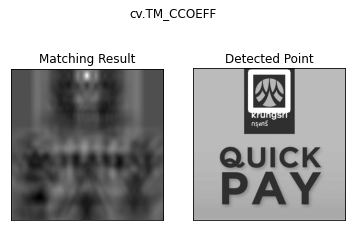

minmaxloc (-0.4397101402282715, 0.9984198212623596, (45, 205), (120, 10))


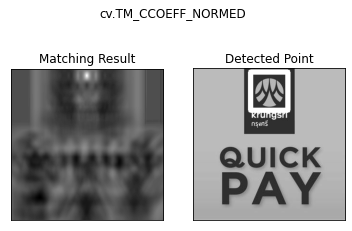

minmaxloc (96746336.0, 163283328.0, (135, 60), (242, 84))


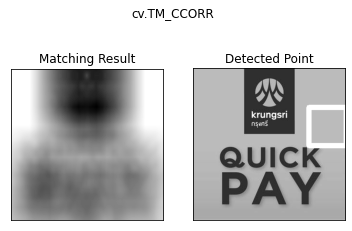

minmaxloc (0.852787435054779, 0.9998317360877991, (145, 66), (120, 10))


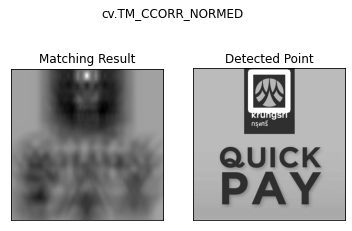

minmaxloc (38640.0, 48093264.0, (120, 10), (242, 84))


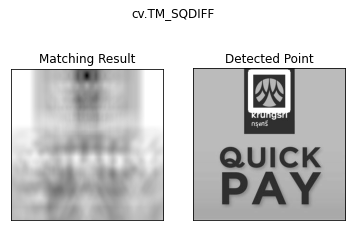

minmaxloc (0.0003364061994943768, 0.30014345049858093, (120, 10), (146, 67))


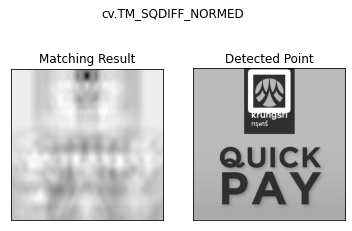

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../datasets/krungsri/sample05.jpg',0)
img2 = img.copy()
template = cv.imread('../datasets/krungsri/template1.jpg',0)

w, h = template.shape[::-1]


# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    print('minmaxloc',cv.minMaxLoc(res))
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 10)
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()